<a href="https://colab.research.google.com/github/FlowerCba/FlowerPlace/blob/main/ED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EdMachina Challenge - Analisis de datos**
Llegan datos  de una institución que tiene problemas en sus datos y necesita ayuda para aclarar si estos datos pueden hacer un buen modelo que prediga la probabilidad de aprobación de un cierto curso o no. Hay dos posibles variables a predecir (target y target_b). Se necesita ayudar al cliente a determinar qué target hace más lógica respecto a cómo interactúan con las otras variables.

In [4]:
 # Mounting GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Reading the file
import pandas as pd

file_path = '/content/drive/My Drive/EdMachina/dataset_challenge_edmachina-2.xlsx'
data = pd.read_excel(file_path)

**Basic data exploration** - An initial data exploration to understand its structure and distributions.

In [6]:
data.head(10) # Showing first 10 rows and checking basic data structure

,matricula,course_id,area,user_id,sexo,edad,ejercicio_academico,semestre,tiempo_actividades,tiempo_desarrollo,tiempo_general,valor_calif_primer_parcial,valor_calif_segundo_parcial,valor_calif_final_real,sum_points,count_points,count_subbmision,sum_score,target,target_b
0,FG256,111444477788333664,Idiomas,1342795678817385,M,25,2021-01-01,2,1.720800e+09,1.706400e+09,1.965600e+09,87.0,98.0,89.0,443.0,5.0,6.0,279.0,0,1
1,DE5355,133344477788333664,Matemática,2370785941394635,F,28,2021-01-01,2,1.972800e+09,1.731600e+09,1.879200e+09,79.0,97.0,92.0,266.0,5.0,2.0,256.0,0,1
2,HI4650,133344477788333664,Matemática,1812868984238778,M,26,2021-02-01,1,1.872000e+09,1.429200e+09,1.735200e+09,76.0,65.0,98.0,481.0,6.0,5.0,369.0,0,0
3,NM4364,133344499988333664,Lengua,-135586768863004,F,18,2023-02-01,1,2.030400e+09,1.767600e+09,1.623600e+09,91.0,71.0,65.0,374.0,5.0,5.0,180.0,0,0
4,JK3568,111444477488373664,Lengua,-2150952171478082,F,18,2020-02-01,2,1.800000e+09,1.688400e+09,1.972800e+09,68.0,88.0,60.0,360.0,4.0,2.0,107.0,0,0
5,MO6956,111444477788333664,Idiomas,-5110524934994936,F,24,2021-02-01,1,1.724400e+09,1.648800e+09,1.584000e+09,71.0,85.0,70.0,225.0,6.0,7.0,254.0,0,1
6,HI6030,111444477488373664,Lengua,-3919091682522122,F,25,2021-01-01,1,2.102400e+09,1.641600e+09,1.782000e+09,74.0,62.0,79.0,283.0,7.0,2.0,169.0,0,0
7,BC2841,133344499988333664,Lengua,-5658859434579100,M,22,2021-02-01,1,1.882800e+09,1.562400e+09,1.569600e+09,66.0,73.0,86.0,445.0,3.0,3.0,460.0,0,0
8,AB8805,111444477488373664,Lengua,-6164385227723320,M,19,2021-01-01,1,2.120400e+09,1.504800e+09,1.670400e+09,66.0,96.0,67.0,132.0,3.0,2.0,402.0,0,0
9,KL9481,133344499988398884,Ciencias,-2567106962587741,F,21,2020-02-01,2,1.789200e+09,1.562400e+09,1.900800e+09,95.0,60.0,65.0,250.0,3.0,6.0,107.0,0,0


In [7]:
data.info() # Checking columns description, columns name, number of non-null values, and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208842 entries, 0 to 208841
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   matricula                    208842 non-null  object        
 1   course_id                    208842 non-null  int64         
 2   area                         208842 non-null  object        
 3   user_id                      208842 non-null  int64         
 4   sexo                         208842 non-null  object        
 5   edad                         208842 non-null  int64         
 6   ejercicio_academico          208842 non-null  datetime64[ns]
 7   semestre                     208842 non-null  int64         
 8   tiempo_actividades           208842 non-null  float64       
 9   tiempo_desarrollo            208842 non-null  float64       
 10  tiempo_general               208842 non-null  float64       
 11  valor_calif_primer_parcial

In [8]:
# Previous step showed that there were no null values, but I can double check it using some tools
data.isnull().sum() # Checking null values > to determine if missing data handling is necessary

matricula                      0
course_id                      0
area                           0
user_id                        0
sexo                           0
edad                           0
ejercicio_academico            0
semestre                       0
tiempo_actividades             0
tiempo_desarrollo              0
tiempo_general                 0
valor_calif_primer_parcial     0
valor_calif_segundo_parcial    0
valor_calif_final_real         0
sum_points                     0
count_points                   0
count_subbmision               0
sum_score                      0
target                         0
target_b                       0
dtype: int64

# **Basic statistics**

In [9]:
data.describe()

,course_id,user_id,edad,semestre,tiempo_actividades,tiempo_desarrollo,tiempo_general,valor_calif_primer_parcial,valor_calif_segundo_parcial,valor_calif_final_real,sum_points,count_points,count_subbmision,sum_score,target,target_b
count,2.088420e+05,2.088420e+05,208842.000000,208842.000000,2.088420e+05,2.088420e+05,2.088420e+05,2.088420e+05,2.088420e+05,2.088420e+05,2.088420e+05,2.088420e+05,2.088420e+05,2.088420e+05,208842.000000,208842.000000
mean,3.061224e+17,3.702617e+15,25.522950,1.499670,7.079927e+15,6.192379e+15,6.918201e+15,4.443103e+15,4.435602e+15,4.427711e+15,8.156439e+15,6.773970e+15,6.534339e+15,8.131846e+15,0.521169,0.500503
std,3.158730e+17,4.647633e+15,4.256643,0.500001,8.745519e+15,7.599444e+15,8.481464e+15,8.608098e+15,8.605422e+15,8.576927e+15,1.317633e+16,1.306885e+16,1.247613e+16,1.318495e+16,0.499553,0.500001
min,1.114445e+17,-6.898961e+15,18.000000,1.000000,1.494000e+09,1.382400e+09,1.569600e+09,6.000000e+01,6.000000e+01,6.000000e+01,1.000000e+02,2.000000e+00,-6.029227e+16,1.000000e+02,0.000000,0.000000
25%,1.114445e+17,1.171888e+13,22.000000,1.000000,1.810800e+09,1.580400e+09,1.764000e+09,7.900000e+01,7.900000e+01,7.900000e+01,2.910000e+02,5.000000e+00,4.000000e+00,2.900000e+02,0.000000,0.000000
50%,1.333445e+17,6.899532e+15,25.000000,1.000000,7.570782e+11,1.796400e+09,1.976400e+09,3.238954e+10,3.856083e+10,3.270120e+11,7.402129e+10,1.154268e+11,7.000000e+00,1.199082e+10,1.000000,1.000000
75%,5.333445e+17,7.396977e+15,29.000000,2.000000,1.706400e+16,1.512000e+16,1.702800e+16,7.708248e+15,7.688807e+15,7.683178e+15,1.265737e+16,6.091217e+15,6.394493e+15,1.259220e+16,1.000000,1.000000
max,1.114445e+18,7.894526e+15,34.000000,2.000000,2.156400e+16,1.796400e+16,1.976400e+16,6.399906e+16,6.399576e+16,6.399987e+16,4.999128e+16,7.989526e+16,7.998229e+16,4.998202e+16,1.000000,1.000000


El analisis anterior me permite visualizar rapidamente algunos valores a considerar, por ejemplo ratificar que no faltan valores (todas las variables tienen la misma cantidad de registros), la desviacion estandar de la edad que podria indicar que es una muestra bastante consistente, porque este valor es de 4,25 años.

In [10]:
# Dtermine how many times each class or category appears within the target variable. to get an overview of the distribution of classes in that variable
# The frequency of each class will help to understand the proportion of observations in each category and identify possible class imbalances
target_counts = data['target'].value_counts()
print("Frecuencia de 'target':")
print(target_counts)

target_b_counts = data['target_b'].value_counts()
print("Frecuencia de 'target':")
print(target_b_counts)

Frecuencia de 'target':
1    108842
0    100000
Name: target, dtype: int64
Frecuencia de 'target':
1    104526
0    104316
Name: target_b, dtype: int64


'target':
Hay dos clases en la variable 'target': 0 y 1.
*   La clase 1 tiene una frecuencia de 108,842, lo que significa que hay 108,842 observaciones clasificadas como 1.
*   La clase 0 tiene una frecuencia de 100,000, lo que significa que hay 100,000 observaciones clasificadas como 0.
La distribución no muestra un gran desequilibrio entre las dos clases, aunque hay una pequeña mayoría de observaciones clasificadas como 1.

Para 'target_b' también hay clases 0 y 1.


*   La clase 1 tiene una frecuencia de 104,526, lo que significa que hay 104,526 observaciones clasificadas como 1.
*   La clase 0 tiene una frecuencia de 104,316, lo que significa que hay 104,316 observaciones clasificadas como 0.
La distribución en 'target_b' casi no muestra un desequilibrio entre las dos clases.

Esto es importante para saber que tipo de herramientas utilizar, que metricas aplicar.

**Exploratory Analysis** - Perform an exploratory analysis of the target variables to understand their distributions and how they relate to other characteristics

In [11]:
correlation_with_target = data.corrwith(data['target']).drop(['target', 'target_b'])

<ipython-input-11-df84f6897021>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corrwith(data['target']).drop(['target', 'target_b'])


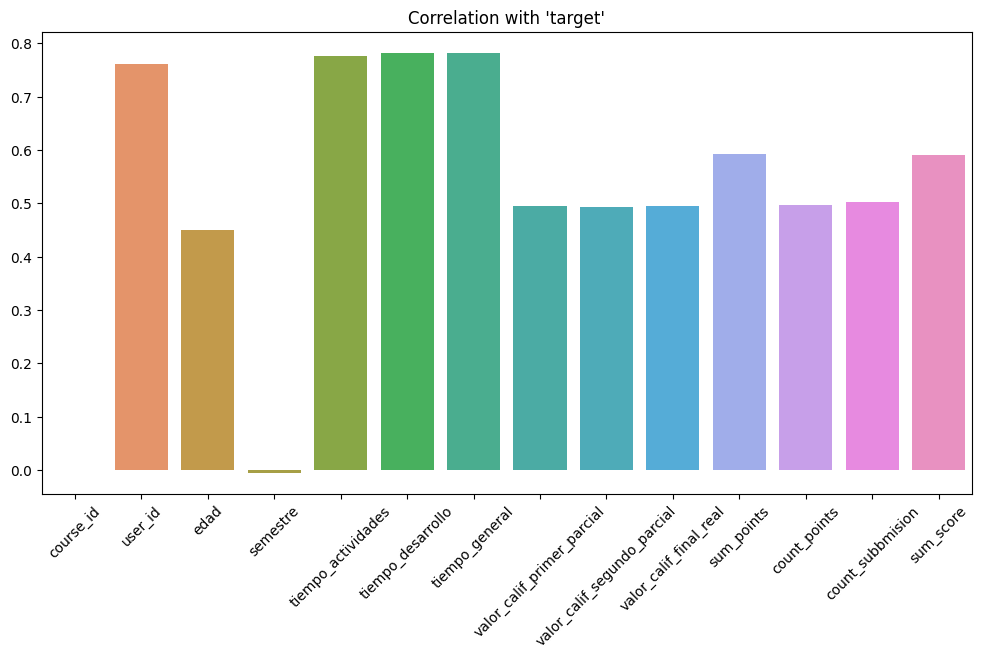

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target)
plt.title("Correlation with 'target'")
plt.xticks(rotation=45)
plt.show()

Las barras con una mayor altura (positiva o negativa) indican una correlación más fuerte.

In [15]:
correlation_with_target_b = data.corrwith(data['target_b']).drop(['target', 'target_b'])

<ipython-input-15-40c4b5c3f1f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target_b = data.corrwith(data['target_b']).drop(['target', 'target_b'])


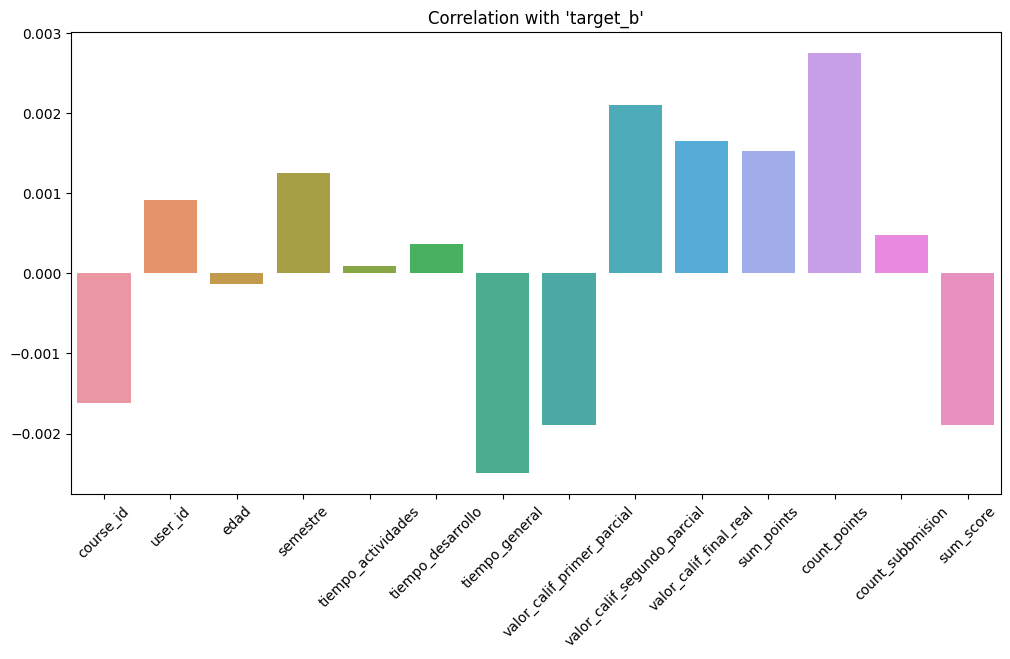

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target_b.index, y=correlation_with_target_b)
plt.title("Correlation with 'target_b'")
plt.xticks(rotation=45)
plt.show()

Para 'target':
'user_id', 'tiempo_actividades', 'tiempo_desarrollo', 'tiempo_general', 'sum_points', 'count_points', 'count_subbmision' y 'sum_score' tienen correlaciones positivas significativas con 'target'. Estas características tienden a aumentar a medida que la variable objetivo 'target' toma el valor 1 (aprobado).
'edad', 'valor_calif_primer_parcial', 'valor_calif_segundo_parcial' y 'valor_calif_final_real' también tienen correlaciones positivas pero un poco menos fuertes, lo que indica que estas características pueden estar relacionadas con la aprobación del curso.

Para 'target_b':
Las correlaciones con 'target_b' son en su mayoría muy cercanas a cero, tienen una relación débil con esta variable objetivo. Las características no aportan mucha información en términos de predicción de 'target_b'.

En base a las correlaciones, 'target' parece estar más relacionada con las características en comparación con 'target_b'. Esto sugiere que 'target' podría ser una mejor variable objetivo.
Podria usar otras herramientas, pero personalmente me gusta ver en barras o con matriz.

<ipython-input-17-9ca39473fe64>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


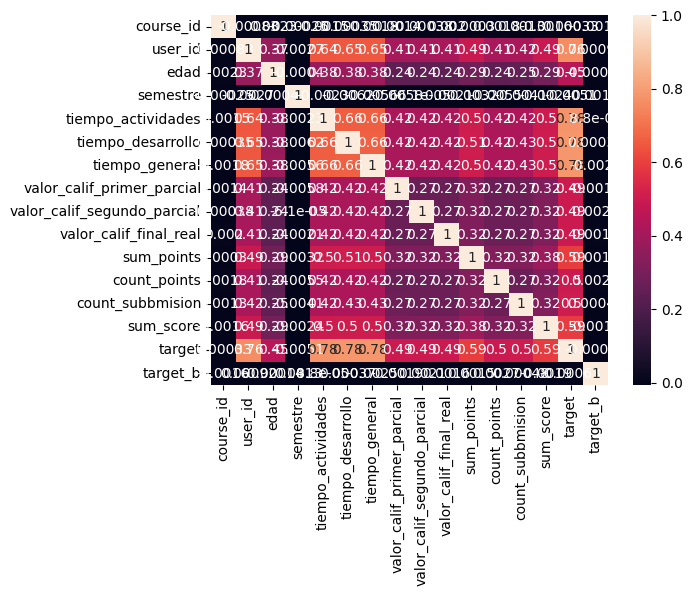

In [17]:
# Ejemplo de matriz para la variable "target"

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


Agrupando variables relevantes: La variable 'user_id' tiene la correlación más fuerte positiva con 'target' (0.761633). Es probable que 'user_id' sea una característica importante para predecir 'target', pero teniendo en cuenta que es solamente el ID en la plataforma me parece un poco curioso.
Las variables relacionadas con el *tiempo en la plataforma de e-learning* ('tiempo_actividades', 'tiempo_desarrollo' y 'tiempo_general') también tienen correlaciones positivas fuertes con 'target', lo que indica que el tiempo dedicado en actividades y desarrollo está relacionado con la aprobación del curso.
Las *calificaciones parciales* ('valor_calif_primer_parcial', 'valor_calif_segundo_parcial' y 'valor_calif_final_real') tienen correlaciones positivas, lo que sugiere que los alumnos que obtienen calificaciones más altas en los parciales tienen una mayor probabilidad de aprobar.
Las variables 'sum_points' y 'sum_score' también tienen correlaciones positivas con 'target', lo que indica que un mayor número de puntos acumulados y una puntuación más alta se asocian con una mayor probabilidad de aprobación.

**Data Modeling**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [34]:
data = pd.get_dummies(data, columns=['sexo', 'area'])  # Categorical variables


In [35]:
data.head()

,matricula,course_id,user_id,edad,ejercicio_academico,semestre,tiempo_actividades,tiempo_desarrollo,tiempo_general,valor_calif_primer_parcial,...,count_subbmision,sum_score,target,target_b,sexo_F,sexo_M,area_Ciencias,area_Idiomas,area_Lengua,area_Matemática
0,FG256,111444477788333664,1342795678817385,25,2021-01-01,2,1.720800e+09,1.706400e+09,1.965600e+09,87.0,...,6.0,279.0,0,1,0,1,0,1,0,0
1,DE5355,133344477788333664,2370785941394635,28,2021-01-01,2,1.972800e+09,1.731600e+09,1.879200e+09,79.0,...,2.0,256.0,0,1,1,0,0,0,0,1
2,HI4650,133344477788333664,1812868984238778,26,2021-02-01,1,1.872000e+09,1.429200e+09,1.735200e+09,76.0,...,5.0,369.0,0,0,0,1,0,0,0,1
3,NM4364,133344499988333664,-135586768863004,18,2023-02-01,1,2.030400e+09,1.767600e+09,1.623600e+09,91.0,...,5.0,180.0,0,0,1,0,0,0,1,0
4,JK3568,111444477488373664,-2150952171478082,18,2020-02-01,2,1.800000e+09,1.688400e+09,1.972800e+09,68.0,...,2.0,107.0,0,0,1,0,0,0,1,0


In [36]:
# Excluding user_id from dataframe

data1 = data.drop('user_id', axis=1) # No me convence la correlacion, la excluyo para ver que pasa

In [37]:
# Splitting into training & testing data
X = data1.drop(['target'], axis=1)  # Characteristics
y = data1['target']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Para el modelado elegí Random Forest, es un modelo versátil y robusto que funciona bien en una variedad de problemas de clasificación. No requiere demasiados parametros y es bastante sencillo de utilizar.

In [39]:
model = RandomForestClassifier(random_state=42)
# The purpose of setting a random seed is to make the model's results reproducible.
#This means that if you run the same code with the same random seed (42 in this case), you will get the same results in terms of training and predictions. This reproducibility is useful for debugging, cross-validation, and result comparison.

In [40]:
# Entrenamiento del Modelo
model.fit(X_train, y_train)

ValueError: ignored

In [41]:
# Reviso donde aparece ese dato
data[data.eq('IJ10061').any(axis=1)]

,matricula,course_id,user_id,edad,ejercicio_academico,semestre,tiempo_actividades,tiempo_desarrollo,tiempo_general,valor_calif_primer_parcial,...,count_subbmision,sum_score,target,target_b,sexo_F,sexo_M,area_Ciencias,area_Idiomas,area_Lengua,area_Matemática
103699,IJ10061,552244499988333664,-2793377516824088,25,2023-01-01,1,1.738800e+09,1.411200e+09,1.634400e+09,76.0,...,3.0,170.0,1,1,1,0,1,0,0,0


In [42]:
# Elimino tambien la columna 'matricula'
data1.drop('matricula', axis=1, inplace=True)

For the Random Forest model to work, you must ensure that all data is numerical. Revisando los datos veo que tb tengo un datetime ('ejercicio_academico').

In [46]:
data1['ejercicio_academico'].unique() # Veo que son 8 semestres entre 2020 y 2023

array(['2021-01-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2023-02-01T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2023-01-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [47]:
# Dropping 'ejercicio_academico'
data1.drop('ejercicio_academico', axis=1, inplace=True)

In [48]:
# Splitting into training & testing data
X = data1.drop(['target'], axis=1)  # Characteristics
y = data1['target']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
feature_importance = model.feature_importances_

In [52]:
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

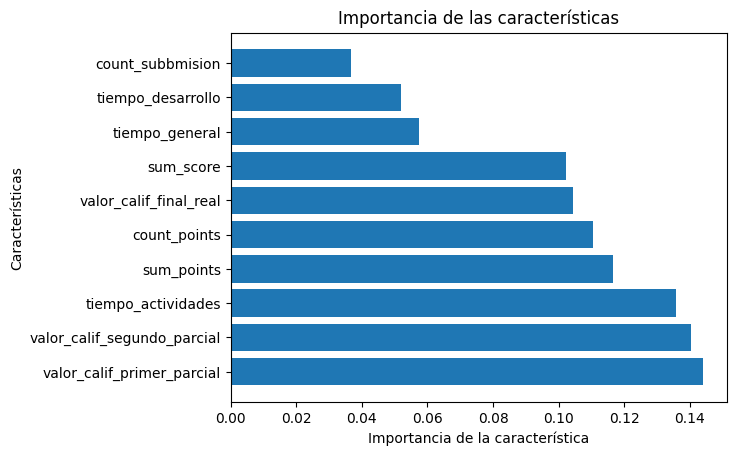

In [53]:
top_features = 10  # PShowing TOP10 features by importance
features, importance = zip(*sorted_feature_importance[:top_features])

plt.barh(features, importance)
plt.xlabel('Importancia de la característica')
plt.ylabel('Características')
plt.title('Importancia de las características')
plt.show()

In [54]:
# Model testing
y_pred = model.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9997605879958821
Precision: 0.9995401241664751
Recall: 1.0
ROC AUC: 0.9999165198780201
Confusion Matrix:
[[20024    10]
 [    0 21735]]




*   Accuracy: La precisión del modelo es muy alta, lo que significa que la mayoría de las predicciones son correctas. El modelo clasifica correctamente el 99.98% de los ejemplos en el conjunto de prueba.
*   Precision: La precisión también es muy alta, lo que indica que la mayoría de las predicciones positivas (aprobación del curso) son correctas. El 99.95% de las predicciones positivas son verdaderas positivas.
*   Recall: El recall es igual a 1.0, lo que significa que el modelo captura el 100% de los casos positivos en el conjunto de prueba. Esto indica que no hay falsos negativos.
1.   ROC AUC: El área bajo la curva ROC (ROC AUC) es casi perfecta, lo que indica una excelente capacidad del modelo para distinguir entre clases positivas y negativas.
2.   Matriz de confusión: Solo hay 10 falsos positivos y ningún falso negativo. Muy pocos errores.